In [1]:
import pandas 
import numpy as np
import scipy as sp
import sympy as sm
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime 
import datetime

In [2]:
def MCOptionPricer(sims, S_0, K, init_date, expiration_Date, N, r, vol, flag):
    T = ((datetime.datetime.strptime(expiration_Date, "%Y-%m-%d")-datetime.datetime.strptime(init_date,"%Y-%m-%d")).days)/252
    dt = T/N
    nu = r- 0.5*(vol**2)
    lnS0 = np.log(S_0)
    lnSt = lnS0 + np.cumsum(nu*dt + vol*np.sqrt(dt)*np.random.normal(size=(N,sims)),axis = 0)
    lnSt = np.concatenate( (np.full(shape=(1,sims),fill_value=lnS0),lnSt))
    St = np.exp(lnSt)
    
    if flag == "call":
        VT = np.maximum(0, St - K)
    elif flag == "put":
         VT = np.maximum(0, K-St)
    else:
        return "Incorrect flag input, should be 'call' or 'put'." 
        
    V0 = np.exp(-1*r*T)*(np.sum(VT[-1])/sims)
    SE = np.sqrt(np.sum((VT[-1]-V0)**2)/(sims-1))/sims
    print("The "+flag+" option price is {0} and the std error is {1}".format(np.round(V0,2),np.round(SE,4)))
   

In [3]:
Share = "AAPL"
ticker = yf.Ticker(Share)
df = yf.download(Share)
print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-12-12    0.128348    0.128906    0.128348    0.128348    0.099584   
1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094388   
1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087461   
1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089625   
1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092224   
...                ...         ...         ...         ...         ...   
2023-07-24  193.410004  194.910004  192.250000  192.750000  192.750000   
2023-07-25  193.330002  194.440002  192.919998  193.619995  193.619995   
2023-07-26  193.669998  195.639999  193.320007  194.500000  194.500000   
2023-07-27  196.020004  197.199997  192.550003  193.220001  193.220001   
2023-07-28  194.669998  196.630005  194.139

In [4]:
print(df["Adj Close"])

Date
1980-12-12      0.099584
1980-12-15      0.094388
1980-12-16      0.087461
1980-12-17      0.089625
1980-12-18      0.092224
                 ...    
2023-07-24    192.750000
2023-07-25    193.619995
2023-07-26    194.500000
2023-07-27    193.220001
2023-07-28    195.830002
Name: Adj Close, Length: 10746, dtype: float64


In [5]:

ticker.options
expiration_date =  ticker.options[10]
expiration_date

'2024-01-19'

In [6]:
options = ticker.option_chain(expiration_date)

In [7]:
options.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240119C00050000,2023-07-27 19:10:17+00:00,50.0,144.20,145.25,149.00,0.000000,0.000000,79,17537,1.150395,True,REGULAR,USD
1,AAPL240119C00055000,2023-07-28 18:43:03+00:00,55.0,142.00,141.25,142.50,1.250000,0.888099,9,3620,1.030278,True,REGULAR,USD
2,AAPL240119C00060000,2023-07-28 16:14:14+00:00,60.0,137.70,136.30,137.75,3.520004,2.623345,3,2215,0.988281,True,REGULAR,USD
3,AAPL240119C00065000,2023-07-28 18:45:04+00:00,65.0,132.40,131.55,132.80,2.449997,1.885338,6,2225,0.947510,True,REGULAR,USD
4,AAPL240119C00070000,2023-07-28 17:52:18+00:00,70.0,126.95,126.70,127.95,2.149994,1.722752,15,1985,0.907960,True,REGULAR,USD
5,AAPL240119C00075000,2023-07-28 17:32:19+00:00,75.0,122.50,121.90,123.10,2.849998,2.381946,16,2739,0.872316,True,REGULAR,USD
6,AAPL240119C00080000,2023-07-28 18:53:38+00:00,80.0,118.05,117.05,118.25,3.600006,3.145484,12,1606,0.834963,True,REGULAR,USD
7,AAPL240119C00085000,2023-07-28 14:58:43+00:00,85.0,112.53,112.10,113.55,-0.020004,-0.017774,1,551,0.800905,True,REGULAR,USD
8,AAPL240119C00090000,2023-07-28 18:53:15+00:00,90.0,108.35,107.40,108.60,2.750000,2.604167,14,1850,0.767580,True,REGULAR,USD
9,AAPL240119C00095000,2023-07-28 18:42:40+00:00,95.0,103.25,102.55,103.80,2.459999,2.440717,3,3303,0.734744,True,REGULAR,USD


In [8]:
options.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240119P00050000,2023-07-28 16:40:11+00:00,50.0,0.01,0.01,0.02,0.000000,0.000000,89.0,39069,0.656253,False,REGULAR,USD
1,AAPL240119P00055000,2023-07-28 16:28:07+00:00,55.0,0.03,0.01,0.03,0.000000,0.000000,5.0,6757,0.625004,False,REGULAR,USD
2,AAPL240119P00060000,2023-07-28 16:28:29+00:00,60.0,0.05,0.03,0.05,0.020000,66.666670,1.0,7128,0.621098,False,REGULAR,USD
3,AAPL240119P00065000,2023-07-27 14:52:07+00:00,65.0,0.04,0.04,0.06,0.000000,0.000000,40.0,2792,0.593754,False,REGULAR,USD
4,AAPL240119P00070000,2023-07-27 19:35:39+00:00,70.0,0.05,0.06,0.08,0.000000,0.000000,1.0,5084,0.576176,False,REGULAR,USD
5,AAPL240119P00075000,2023-07-27 18:46:31+00:00,75.0,0.07,0.07,0.09,0.000000,0.000000,31.0,4350,0.546880,False,REGULAR,USD
6,AAPL240119P00080000,2023-07-28 16:00:28+00:00,80.0,0.09,0.09,0.10,0.020000,28.571432,20.0,11991,0.523442,False,REGULAR,USD
7,AAPL240119P00085000,2023-07-27 19:56:38+00:00,85.0,0.11,0.12,0.14,0.000000,0.000000,11.0,4463,0.508794,False,REGULAR,USD
8,AAPL240119P00090000,2023-07-28 14:13:59+00:00,90.0,0.13,0.14,0.18,0.000000,0.000000,1.0,15407,0.496099,False,REGULAR,USD
9,AAPL240119P00095000,2023-07-25 18:09:10+00:00,95.0,0.16,0.17,0.21,0.000000,0.000000,40.0,6337,0.474126,False,REGULAR,USD


In [9]:
#Getting Risk-free rate
AnnualRate = yf.download("^IRX")["Adj Close"]
DailyRate = (1+AnnualRate)**(1/365)-1


[*********************100%***********************]  1 of 1 completed


In [10]:
#Calculating prices for the calls 

rfrate = DailyRate[-1]
Spot = df["Adj Close"][-1]
Strike_call = options.calls["strike"][1]
Volatility_call  = options.calls["impliedVolatility"][1]



MCOptionPricer(100000,Spot, Strike_call,"2023-07-28",expiration_date, 252, rfrate, Volatility_call, "call" )

The call option price is 143.02 and the std error is 0.002


In [14]:
#Calculating prices for the puts
Strike_put = options.puts["strike"][10]
Volatility_put = options.puts["impliedVolatility"][10]



MCOptionPricer(100000,Spot, Strike_put,"2023-07-28",expiration_date, 252, rfrate, Volatility_put, "put" )

The put option price is 0.77 and the std error is 0.0


Text(0.5, 1.0, 'Call Volatility')

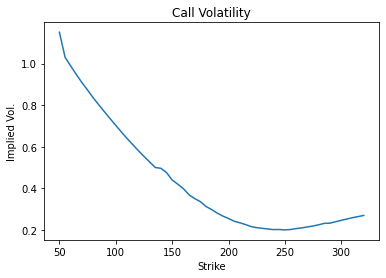

In [12]:
#Plotting Volatility Curves
plt.plot(options.calls["strike"], options.calls["impliedVolatility"])
plt.xlabel("Strike")
plt.ylabel("Implied Vol.")
plt.title("Call Volatility")

Text(0.5, 1.0, 'Put Volatility')

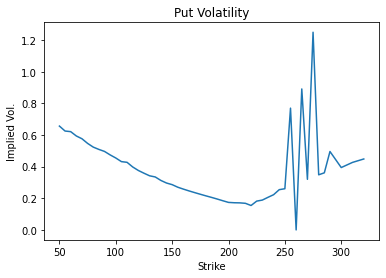

In [13]:
plt.plot(options.puts["strike"], options.puts["impliedVolatility"])
plt.xlabel("Strike")
plt.ylabel("Implied Vol.")
plt.title("Put Volatility")